In [24]:
import pandas as pd

In [25]:
df = pd.read_csv("/content/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [26]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [27]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
extracurricular_activities_values = {"Yes": 1, "No": 0}
df['Extracurricular Activities'] = df['Extracurricular Activities'].map(extracurricular_activities_values)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9820,2.593135,0.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.2727,17.642428,0.0,54.0,69.0,85.0,99.0
Extracurricular Activities,10000.0,0.4948,0.499998,0.0,0.0,0.0,1.0,1.0
Sleep Hours,10000.0,6.5182,1.715856,0.0,5.0,7.0,8.0,10.0
Sample Question Papers Practiced,10000.0,4.5787,2.870336,0.0,2.0,5.0,7.0,10.0
Performance Index,10000.0,55.1023,19.337762,0.0,40.0,55.0,70.0,100.0


In [31]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.000153,0.006330,0.010368,0.018786,0.377658
Previous Scores,-0.000153,1.000000,0.013193,0.030932,0.015529,0.913951
Extracurricular Activities,0.006330,0.013193,1.000000,-0.019007,0.013839,0.028360
Sleep Hours,0.010368,0.030932,-0.019007,1.000000,0.009669,0.064055
Sample Question Papers Practiced,0.018786,0.015529,0.013839,0.009669,1.000000,0.048475
Performance Index,0.377658,0.913951,0.028360,0.064055,0.048475,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

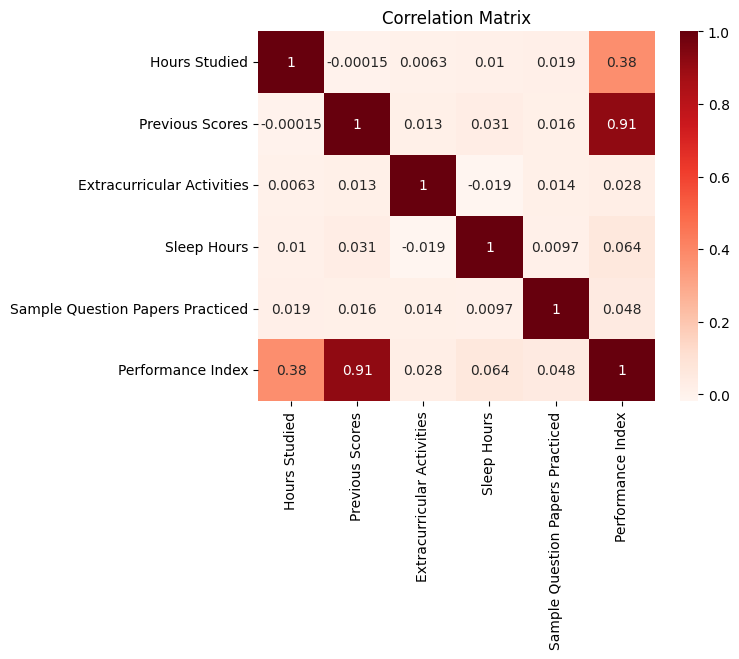

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap="Reds", annot=True)
plt.title("Correlation Matrix")

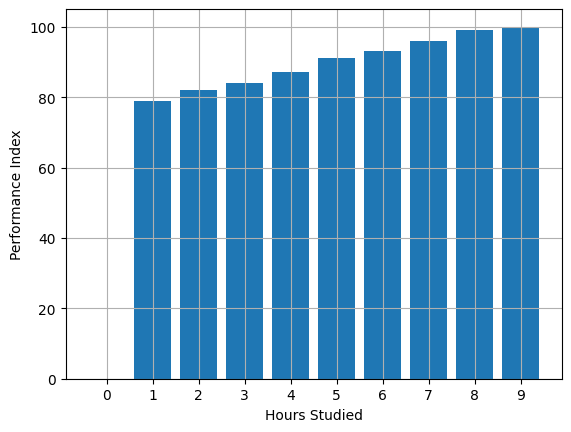

In [10]:
plt.bar(df['Hours Studied'], df['Performance Index'])
plt.xticks(df['Hours Studied'].unique())
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(True)

Text(0, 0.5, 'Performance Index')

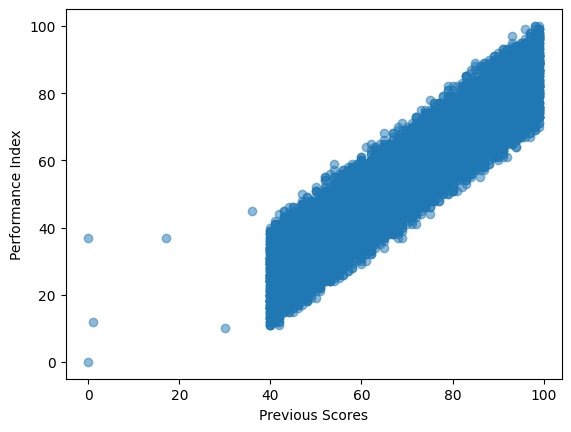

In [11]:
plt.scatter(df['Previous Scores'], df['Performance Index'], alpha=0.5)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')

In [33]:


from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [34]:
x = df.drop('Performance Index',axis=1)
y = df['Performance Index']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [54]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [55]:
y_pred_train = model.predict(X_train)
print("Model Evaluation on Train Data")
print("MAE:",mean_absolute_error(y_train, y_pred_train))
print("MSE:",mean_squared_error(y_train, y_pred_train))
print("R2_score:",r2_score(y_train, y_pred_train))

Model Evaluation on Train Data
MAE: 1.7344228145362781
MSE: 7.630716367939232
R2_score: 0.9794607538716171


In [56]:
y_pred_test = model.predict(X_test)
print("Model Evaluation on Test Data")
print("MAE:",mean_absolute_error(y_test, y_pred_test))
print("MSE:",mean_squared_error(y_test, y_pred_test))
print("R2_score:",r2_score(y_test, y_pred_test))

Model Evaluation on Test Data
MAE: 1.7511910765771264
MSE: 7.153309322726556
R2_score: 0.9811441438926305


In [57]:
hours_studied = 9
previous_scores = 70
extracurricular_activities = 1
sleep_hours = 9
sample_question_paper_practiced = 9

student = [[hours_studied, previous_scores, extracurricular_activities, sleep_hours, sample_question_paper_practiced]]
performance_index =  model.predict(student)
performance_index

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.06894773])

In [58]:
hours_studied = 0
previous_scores = 0
extracurricular_activities = 0
sleep_hours = 0
sample_question_paper_practiced = 0

student = [[hours_studied, previous_scores, extracurricular_activities, sleep_hours, sample_question_paper_practiced]]
performance_index =  model.predict(student)
performance_index

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-31.42976355])

In [59]:
# prompt: make a model file of model using pickel

import pickle

filename = 'Lnewmodel.sav'
pickle.dump(model, open(filename, 'wb'))
